This project is taken from - https://krischer.github.io/seismo_live_build/html/Reproducible%20Papers/Syngine_2016/figure_1_phase_relative_times_wrapper.html All the credit goes to their respective owners This is just for personal learning purpose If I modify the code I will mention it.



In [1]:
# importing the necessities
import obspy
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")
from obspy.clients.syngine import Client
c = Client()

In [2]:
models = c.get_available_models()  # its some function of syngine module to get information about all the available velocity models
models

{'ak135f_5s': {'components': 'vertical and horizontal',
  'description': 'ak135 with density & Q of Montagner & Kennet(1996)',
  'max_sampling_period': '1.278000',
  'default_components': 'ZNE',
  'max_event_depth': 750000,
  'length': 3904.29,
  'min_period': 5.125,
  'max_period': '~100',
  'default_dt': '0.25'},
 'prem_a_2s': {'components': 'vertical and horizontal',
  'description': 'anisotropic PREM',
  'max_sampling_period': '0.512260',
  'default_components': 'ZNE',
  'max_event_depth': 750000,
  'length': 3609.89347171399,
  'min_period': 2.09999990463257,
  'max_period': '~100',
  'default_dt': '0.1'},
 'prem_i_2s': {'components': 'vertical and horizontal',
  'description': 'isotropic PREM',
  'max_sampling_period': '0.512260',
  'default_components': 'ZNE',
  'max_event_depth': 750000,
  'length': 3609.89347171448,
  'min_period': 2.09999990463257,
  'max_period': '~100',
  'default_dt': '0.1'},
 'ak135f_2s': {'components': 'vertical and horizontal',
  'description': 'ak135 w

In [20]:
# Chile earthquake 2015-09-16 22:55:22 Mw 8.3
event_id = "GCMT:C201509162254A"

In [21]:
network = "IU"
station = "ANMO"

# Get a real station.
from obspy.clients.fdsn import Client
c_fdsn = Client("IRIS")
print(c_fdsn.get_stations(network=network, station=station, format="text")[0][0])

Station ANMO (Albuquerque, New Mexico, USA)
	Station Code: ANMO
	Channel Count: None/None (Selected/Total)
	1989-08-29T00:00:00.000000Z - 1995-07-14T00:00:00.000000Z
	Access: None 
	Latitude: 34.95, Longitude: -106.46, Elevation: 1850.0 m
	Available Channels:



28 arrivals
	P phase arrival at 691.955 seconds
	pP phase arrival at 697.665 seconds
	sP phase arrival at 699.754 seconds
	PcP phase arrival at 707.881 seconds
	PP phase arrival at 855.963 seconds
	PKiKP phase arrival at 1048.759 seconds
	pPKiKP phase arrival at 1054.742 seconds
	sPKiKP phase arrival at 1056.774 seconds
	S phase arrival at 1261.209 seconds
	SKiKP phase arrival at 1261.481 seconds
	pS phase arrival at 1268.335 seconds
	sS phase arrival at 1270.622 seconds
	SP phase arrival at 1291.988 seconds
	PS phase arrival at 1294.389 seconds
	SKS phase arrival at 1297.744 seconds
	SKKS phase arrival at 1297.945 seconds
	ScS phase arrival at 1300.326 seconds
	pSKS phase arrival at 1305.392 seconds
	sSKS phase arrival at 1307.522 seconds
	SS phase arrival at 1544.095 seconds
	PKIKKIKP phase arrival at 1851.906 seconds
	PKKP phase arrival at 1866.736 seconds
	SKIKKIKP phase arrival at 2064.649 seconds
	PKIKKIKS phase arrival at 2066.681 seconds
	SKIKKIKS phase arrival at 2279.207 seco

C:\Users\akash\anaconda3\lib\site-packages\obspy\taup\tau.py:882: UserWarning: Not able to evaluate positions of points on path. Arrivals object will not be modified. Install the Python module 'geographiclib' to solve this issue.
  warnings.warn(msg)
C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ObsPyDeprecationWarning: The plot() function is deprecated. Please use arrivals.plot_rays()
  # This is added back by InteractiveShellApp.init_path()


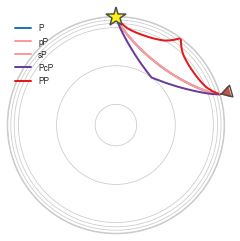

In [22]:
# Plot the ray paths just to illustrate what we are working with.
from obspy.taup import TauPyModel
m = TauPyModel("ak135")  # checkout very interesting docmentation of  function TauPyModel of Obspy.
print(m.get_travel_times_geo(source_depth_in_km=17.4, source_latitude_in_deg=-31.130,
                             source_longitude_in_deg=-72.090, receiver_latitude_in_deg=34.95,
                             receiver_longitude_in_deg=-106.46))
# get_travel_times_geo will calculate the travel times of various phases from the source to receivers under various models specified in m.

m.get_ray_paths_geo(source_depth_in_km=17.4, source_latitude_in_deg=-31.130,
                    source_longitude_in_deg=-72.090, receiver_latitude_in_deg=34.95,
                    receiver_longitude_in_deg=-106.46, phase_list=["P", "pP", "sP", "PcP", "PP"]).plot();


# From the observations below we can learn what phases come first and what come later, P waves is not visible in the figure
# because it has same raypath as P wave starts at source and ends directly at receiver without any reflection.
# pP the P wave directed towards free surface is then reflected back and sP phase is directed towards free surface
# another interesting thing PcP comes before than PP.
# we can change the models in the model parameter

In [23]:
# Calculate distance.
from obspy.geodetics import locations2degrees

locations2degrees(lat1=-31.130, long1=-72.090, lat2=34.95, long2=-106.46)
# convert the distance in degrees

73.562791237968113

In [24]:
models.keys()

dict_keys(['ak135f_5s', 'prem_a_2s', 'prem_i_2s', 'ak135f_2s', 'prem_a_10s', 'iasp91_2s', 'prem_a_20s', 'prem_a_5s', 'ak135f_1s'])

In [25]:
for model in models.keys():
    print(model)

ak135f_5s
prem_a_2s
prem_i_2s
ak135f_2s
prem_a_10s
iasp91_2s
prem_a_20s
prem_a_5s
ak135f_1s


In [26]:
components = "Z"
# Varying length of databases. Use common time range.
starttime = obspy.UTCDateTime("2015-09-16T22:55:22.000000Z")
endtime = obspy.UTCDateTime("2015-09-16T23:23:46.200000Z")

data = {}
for model in models.keys():
    # Download the data for each model.
    data[model] = c.get_waveforms(model=model, network=network, station=station,
                                  components=components, dt=0.05, eventid=event_id,
                                  starttime=starttime, endtime=endtime)
    # https://docs.obspy.org/packages/autogen/obspy.clients.syngine.client.Client.get_waveforms.html
    # remember from obspy.clients.syngine import Client
    # c = Client()
    # so get_waveforms will get the traces observed at the specific receiver for that event under that particular model mentioned
    # at that particular frequency. 
    # so basically we are using syngine client for obtaining synthetic seismograms for real events using a particular event id

In [60]:
data['ak135f_5s']

1 Trace(s) in Stream:
IU.ANMO.SE.BXZ | 2015-09-16T22:55:22.000000Z - 2015-09-16T23:23:46.200000Z | 20.0 Hz, 34085 samples

In [29]:
a = enumerate(sorted(data.keys(),key=lambda x: (int(x.split("_")[-1][:-1]), x))) 
print(list(a))

[(0, 'ak135f_1s'), (1, 'ak135f_2s'), (2, 'iasp91_2s'), (3, 'prem_a_2s'), (4, 'prem_i_2s'), (5, 'ak135f_5s'), (6, 'prem_a_5s'), (7, 'prem_a_10s'), (8, 'prem_a_20s')]


In [58]:
x = 'prem_i_2s'
x.split("_")[-1][:-1]
sorted(data.keys(),key=lambda x: (int(x.split("_")[-1][:-1]),x))  # sorted(iterable,keys) keys = function to execute on the iterable items to decide the order.
# now lambda will output (2,ak135_2s) annd then we will sort and enumerate this matrix

['ak135f_1s',
 'ak135f_2s',
 'iasp91_2s',
 'prem_a_2s',
 'prem_i_2s',
 'ak135f_5s',
 'prem_a_5s',
 'prem_a_10s',
 'prem_a_20s']

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

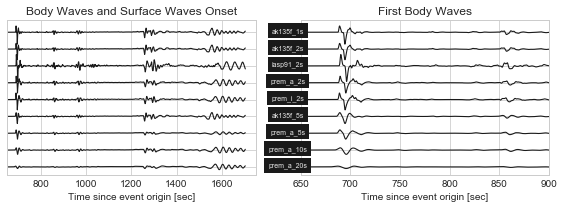

In [59]:
# plot everything.
plt.figure(figsize=(8, 3))
factor = 1E2

for _i, model in enumerate(sorted(data.keys(),
                                  key=lambda x: (int(x.split("_")[-1][:-1]), x))):
    tr = data[model][0]    #basically data[model] is a stream containing traces of the corresponding model
    pos = len(data) - _i - 1
    
    plt.subplot(121)
    plt.plot(tr.times(), tr.data * factor + pos, color="0.1", lw=1.1)

    plt.yticks(list(range(9)), [""] * 9)
    plt.ylim(-0.5, 8.7)
    plt.xlim(650, 1750)
    plt.xlabel("Time since event origin [sec]")
    plt.title("Body Waves and Surface Waves Onset")
    
    plt.subplot(122)
    plt.plot(tr.times(), tr.data * factor + pos, color="0.1", lw=1.1)
    plt.yticks(list(range(9)), [""] * 9)
    plt.ylim(-0.5, 8.7)
    plt.xlim(650, 900)
    plt.text(637, pos, model, color="0.9",
             bbox=dict(facecolor="0.1", edgecolor="None"),
             ha="center", fontsize=7)         
    plt.xlabel("Time since event origin [sec]")
    plt.title("First Body Waves")
    

    
plt.tight_layout()
plt.savefig("compare_seismograms_for_all_models.pdf")
plt.show()